# 18 sympy - symbolic computation in python

So far, we have focussed on *numerical* computation. Our focus was to give *approximate* numerical values of complex expressions.

*Symbolic computation* deals with the *exact* computation of general mathematical objects. Symbolic computation software are often called Computer Algebra Systems (CAS). Some of the most popular CAS are Mathematica (from Wolfram Research in Champaign Illinois), Maple (from Maple Software in Waterloo), sageMath (connected to U. of Washington), or the symbolic toolbox in matlab (formerly mupad from University of Paderborn, Germany). 

We will focus on [Sympy](https://sympy.org), which has the advantage of using python syntax and interfacing with matplotlib, numpy etc.


## Numeric vs symbolic computation
A first use of symbolic computation would be to perform exact algebra. Consider the following calculation:

Let $x = \sqrt{27}$ and $y = \sqrt{3}$. Then $x/y = \sqrt{27}/\sqrt{3} = 3\sqrt{3} / \sqrt{3} = 3$.
Let's do this computation with python / numpy:

In [27]:
import numpy as np
x = np.sqrt(27)
y = np.sqrt(3)
print (x/y)

3.0000000000000004


x = 3*sqrt(3), y = sqrt(3), x/y = 3


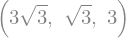

In [28]:
import sympy
x = sympy.sqrt(27)
y = sympy.sqrt(3)
print(f"x = {x}, y = {y}, x/y = {x/y}")
x,y,x/y

Loosely speaking, `np.sqrt(3)` represent the number obtained by taking the square root of 3. `sympy.sqrt(3)` represent the sequence of operations consisting in taking a number (3) and its square root. When evaluating `sympy.sqrt(27) / sympy.sqrt(3)`, sympy evaluates the sequence of operations involved. The `/` and `sqrt` operators are complex rules, capable of doing automatic simplifications.
See for instance:

In [29]:
sympy.sqrt(27)

It gets *much* better than that... Just sympy is capable of representing teh square root in `sqrt(27)` as "the operation of taking the square root" of something that happens to be 27, it can deal with *symbols*:

In [30]:
from sympy import *
x = Symbol('x')
y = Symbol('y')
expr = x + 2*y
expr

In [31]:
(expr - x)**2

In [32]:
x * expr

For the sake of it, we can peek at the representation of these expressions:

In [33]:
srepr(x*(x + 2*y))

"Mul(Symbol('x'), Add(Symbol('x'), Mul(Integer(2), Symbol('y'))))"

### `/`, `//`, and `Rational`
Because it is built on top of python and because python evaluate the expressions it understands, constant fractions require a special treatment:

`expr = 1/2` is exactly teh same as `expr = 0.5`. If we wanted to clearly indicate that we work with rational numbers and want to keep the ratio expressed as an integer, we can either use `Integers` or `Rational`:

In [115]:
expr = 1/2
expr

In [116]:
expr = Integer(1) / Integer(2)
expr

In [117]:
expr = Rational(1,2)
expr

### Sympy can simplify, factor or expand expressions: 

In [34]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

In [35]:
factor(expanded_expr)

We can make sympy's output more math-y using `sympy.init_printing`

In [36]:
sympy.init_printing(pretty_print=False)
expanded_expr

x**2 + 2*x*y

In [37]:
sympy.init_printing(pretty_print=True)
expanded_expr

### Some examples of what sympy can do

In [38]:
from sympy import *
diff(sin(x)*exp(x), x)

In [39]:
integrate(x**2*sin(x), x)

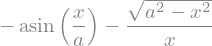

In [40]:
a = Symbol('a', positive=True)
integrate(sqrt(a**2-x**2)/x**2, x)

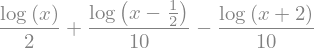

In [133]:
### Example2 Chapter 7.4 in Stewart calculus:
x = Symbol('x')
integrate((x**2+2*x-1)/(2*x**3+3*x**2-2*x),x)
# note that the result is not perfect. It assumes that x > 1/2. 
# The general result has log(|...|) in it

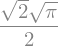

In [41]:
integrate(sin(x**2), (x, -oo, oo))

In [42]:
limit(sin(x)/x, x, 0)

In [43]:
solve(x**2 - a, x)

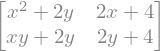

In [44]:
Matrix([[x, 2], [y, 2]])**2

## Symbols

Symbols are like mathematical independent variables. In order to define an expression, we must declare its arguments as symbols:

In [46]:
z = Symbol('z')
expr = z+1
expr

In the line above, we have defined a python variable `a` whose type is `sympy.Symbol`, and which will be displayed as 'z'.
Technically, one could do evil things like this...
Please don't...

In [47]:
z = Symbol('alpha')
alpha = Symbol('z')
z+ 2 * alpha


In [48]:
del(alpha) 
del(z)

## Substitution

`subs` can be used to do mathematical substitutions. Note that it does *not* change the expression (sympy expressions are immutable) on which it acts

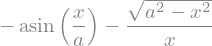

In [49]:
expr = integrate(sqrt(a**2-x**2)/x**2, x)
expr

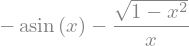

In [50]:
expr.subs(a,1)

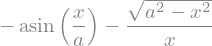

In [51]:
expr

In [54]:
expr = cos(x/a)
expr.subs(x,0)

In [71]:
expr = Matrix([2*x+y, 3*x-y])

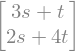

In [68]:
s,t = symbols(('s','t'))
# Thus is a shortcut for
# s= Symbol('s')
# t - Symbol('t')
expr.subs([(x, s+t),(y,s-t)])

in passing, this is composing x = s+t and y = s-t into (2*x+y, 3*x-y), which is how I introduced matrices... And by the way: 

In [73]:
np.array([[2,1],[3,-1]])@np.array([[1,1],[1,-1]])

array([[3, 1],
       [2, 4]])

Or the sympy way:

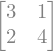

In [74]:
Matrix([[2,1],[3,-1]]) * Matrix([[1,1],[1,-1]])

## numerical evaluation
Sometimes, we may want to get the numerical value of a complex expression. we can use `evalf` to do this:

In [134]:
pi.evalf(100)

In [135]:
exp(1).evalf(32)

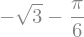

In [119]:
integrand = sqrt(a**2-x**2)/x**2
expr = integrate(integrand, x)
expr4 = expr.subs(a,1)
expr2 = expr4.subs([(x,Rational(1,2)),(a,1)])
expr2

In [120]:
expr2.evalf()

Another way of evaluating is to convert an expression into a python function, and evaluating the function:

In [122]:
f = lambdify(x, expr4)
f(1/2)

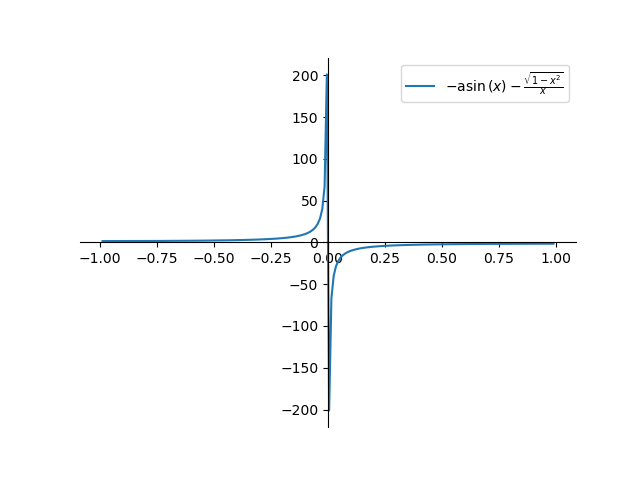

In [125]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
X = np.linspace(-0.99,0.99,200)
ax.plot(X,f(X), label = f'${latex(expr4)}$')
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()